In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve,auc
%matplotlib inline

In [2]:
df = pd.read_csv('telco_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df.dropna(inplace = True)

In [10]:
df_dummies = (df.iloc[:,1:])
df_dummies['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df_dummies['Churn'].replace(to_replace='No',  value=0, inplace=True)
df_dummies = pd.get_dummies(df_dummies)

In [11]:
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

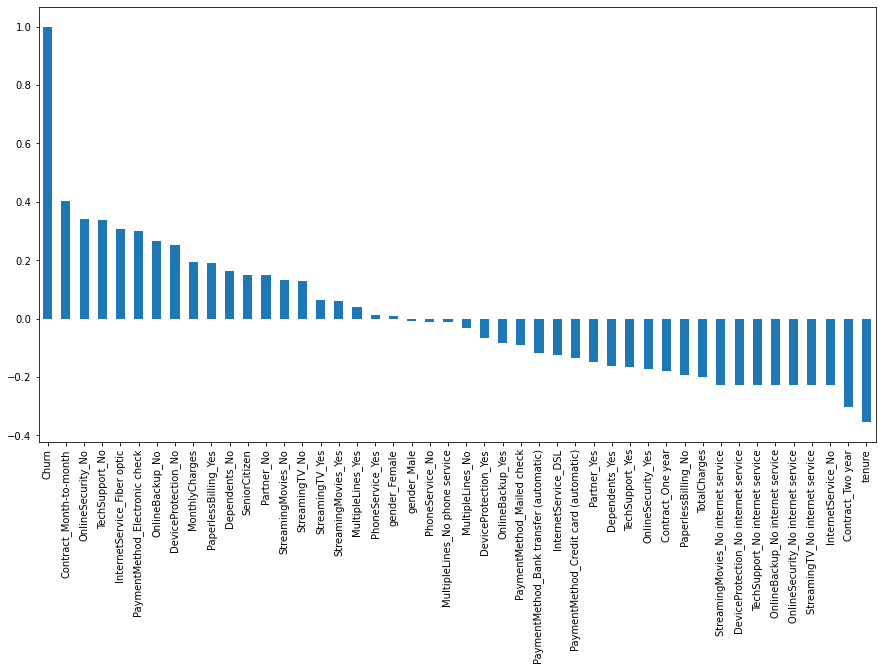

In [12]:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

### ANÁLISE GRÁFICA

#### Quantidade de clientes em Churn

<AxesSubplot:xlabel='Churn', ylabel='count'>

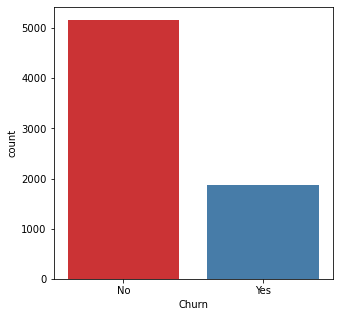

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(x="Churn", data = df, palette="Set1")

### Como a variável com maior correlação (visto acima) é 'Contract', vamos ver como está a distribuição dela:

<AxesSubplot:xlabel='Contract', ylabel='count'>

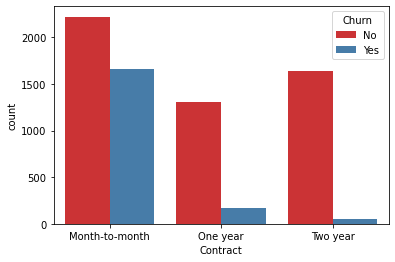

In [14]:
sns.countplot(data=df, x = 'Contract',  hue = 'Churn', palette="Set1")

#### Podemos inferir que o contrato do tipo "month-to-month" pode ser impactante no churn dos clientes

### Outra variável que tem grande impacto é 'tenure':

<AxesSubplot:xlabel='tenure', ylabel='Churn'>

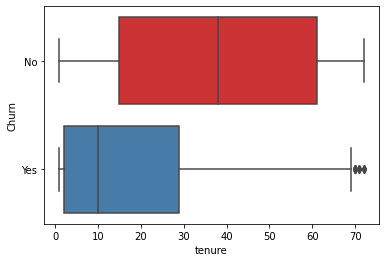

In [15]:
sns.boxplot(data = df, x="tenure", y="Churn", palette="Set1")

#### Podemos perceber que a maioria dos clientes que realizaram Churn possuíam, em média, menos tempo de contrato

### Algumas outras variáveis possuem um impacto parecido na correlação com "Churn"

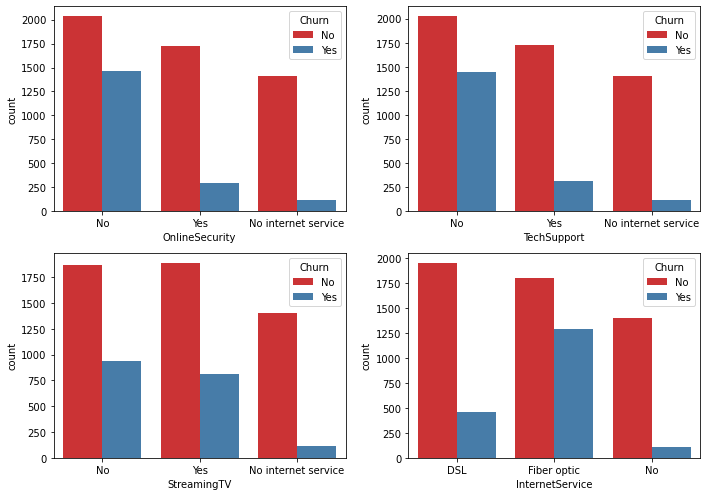

In [16]:
fig, axs = plt.subplots(2,2, figsize = (10,7))

sns.countplot(data = df, x="OnlineSecurity", hue="Churn", ax=axs[0, 0], palette="Set1")
sns.countplot(data = df, x="TechSupport", hue="Churn", ax=axs[0, 1], palette="Set1")
sns.countplot(data = df, x="StreamingTV", hue="Churn", ax=axs[1, 0], palette="Set1")
sns.countplot(data = df, x="InternetService", hue="Churn", ax=axs[1, 1], palette="Set1")

fig.tight_layout()

## Hora da classificação!

#### .

In [17]:
X = df_dummies.drop(['Churn'], axis=1)
y = df_dummies['Churn']

In [18]:
scaler = StandardScaler()

cols = X.columns.values

scaler.fit(X)

X = pd.DataFrame(scaler.transform(X))

X.columns = cols

In [19]:
RFC = RandomForestClassifier(n_estimators=100, random_state=7)
RFC.fit(X, y)

RandomForestClassifier(random_state=7)

In [20]:
best_features = pd.Series(RFC.feature_importances_,index=X.columns)

In [21]:
features = []

for feature, value in best_features.iteritems():
    if (value > 0.02):
        features.append(feature)

In [22]:
X = df_dummies[features]
y = df_dummies['Churn']

In [23]:
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)

In [24]:
kfold = StratifiedKFold(n_splits=3)

In [25]:
models = []

models.append(SVC(random_state = 7))
models.append(DecisionTreeClassifier(random_state = 7))
models.append(RandomForestClassifier(random_state = 7))
models.append(ExtraTreesClassifier(random_state = 7))
models.append(GradientBoostingClassifier(random_state = 7))
models.append(LogisticRegression(random_state = 7))

model_names = ['SVC', 'DecisionTreeClassifier', 'RandomForestClassifier', 'ExtraTreesClassifier', 
               'GradientBoostingClassifier', 'LogisticRegression']

In [26]:
scores = []

for model in models :
    scores.append(cross_val_score(model, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=5))

In [27]:
scores_mean = []

for score in scores:
    scores_mean.append(score.mean())

In [28]:
scores_table = pd.DataFrame({"Modelo":model_names, "Media":scores_mean})

scores_table

,Modelo,Media
0,SVC,0.738339
1,DecisionTreeClassifier,0.738908
2,RandomForestClassifier,0.785173
3,ExtraTreesClassifier,0.770573
4,GradientBoostingClassifier,0.806219
5,LogisticRegression,0.803375


<AxesSubplot:xlabel='Media', ylabel='Modelo'>

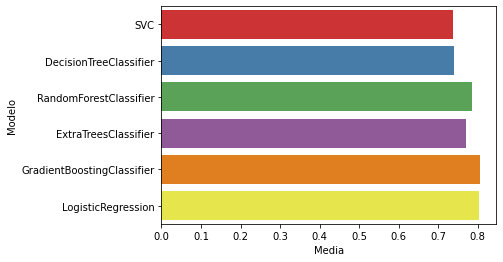

In [29]:
sns.barplot(x = "Media", y = "Modelo", data = scores_table, palette="Set1", orient = "h")

In [30]:
LR = LogisticRegression(random_state = 7)

LR.fit(X_train, Y_train)

predictions = LR.predict(x_test)

In [31]:
print ("\naccuracy_score:",accuracy_score(y_test, predictions))
print ("\n------------------------------------------------------")
print ("\nclassification report: \n\n",(classification_report(y_test, predictions)))
print ("\n------------------------------------------------------")
print ("\nconfusion matrix: \n\n", confusion_matrix(y_test, predictions))


accuracy_score: 0.7792946530147895

------------------------------------------------------

classification report: 

               precision    recall  f1-score   support

           0       0.83      0.88      0.85      1269
           1       0.62      0.52      0.57       489

    accuracy                           0.78      1758
   macro avg       0.73      0.70      0.71      1758
weighted avg       0.77      0.78      0.77      1758


------------------------------------------------------

confusion matrix: 

 [[1115  154]
 [ 234  255]]


In [32]:
GBC = GradientBoostingClassifier(random_state = 7)

GBC.fit(X_train, Y_train)

predictions = GBC.predict(x_test)

In [33]:
print ("\naccuracy_score:",accuracy_score(y_test, predictions))
print ("\n------------------------------------------------------")
print ("\nclassification report: \n\n",(classification_report(y_test, predictions)))
print ("\n------------------------------------------------------")
print ("\nconfusion matrix: \n\n", confusion_matrix(y_test, predictions))


accuracy_score: 0.7861205915813424

------------------------------------------------------

classification report: 

               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1269
           1       0.65      0.51      0.57       489

    accuracy                           0.79      1758
   macro avg       0.74      0.70      0.71      1758
weighted avg       0.78      0.79      0.78      1758


------------------------------------------------------

confusion matrix: 

 [[1132  137]
 [ 239  250]]
